# SDXL DreamBooth LoRA Training

## Description of Project

This project aims to utilize advanced techniques in machine learning and image processing to train a Stable Diffusion model for generating specific images. The primary technique employed is DreamBooth, enhanced with Low-Rank Adaptation (LoRA). DreamBooth allows for fine-tuning pre-trained diffusion models on custom datasets, significantly improving the model's ability to generate desired images based on provided examples.

In this particular project, the model is trained on a dataset of 10 images featuring the cartoon character Tom from "Tom and Jerry". By fine-tuning the model with these specific images, it learns to generate images that closely resemble the style, features, and characteristics of Tom. This capability can be extended to other datasets and characters, making the model highly versatile for various image generation tasks.

## Objective of Project

The primary objectives of this project are:

1. **Custom Image Generation**:
   - Develop a model capable of generating high-quality images based on a specific dataset of images.
   - Fine-tune the Stable Diffusion model to replicate the style and features of the provided training images.

2. **Application of DreamBooth and LoRA Techniques**:
   - Implement DreamBooth and LoRA techniques to enhance the fine-tuning process.
   - Demonstrate the effectiveness of these techniques in improving the model's ability to generate accurate and detailed images.

3. **User-Friendly Image Upload and Training**:
   - Add functionality to the notebook that allows users to upload their own images for training.
   - Ensure that the uploaded images are properly stored and used for model fine-tuning, making the process accessible and user-friendly.

4. **Efficiency and Optimization**:
   - Optimize the training process to reduce redundant operations and improve efficiency.
   - Implement methods to streamline data loading, preprocessing, and model training steps.

## Dataset

The dataset used for this project consists of 10 images of the cartoon character Tom from "Tom and Jerry". You can train the model on any dataset of your choice by providing the appropriate images.

### Dataset Details

- **Source**: Custom dataset created from images of Tom.
- **Number of Images**: 10
- **Image Type**: Cartoon character images

## How To Use

1. **Setup Environment**:
   - Clone the repository or download the specific project files.
   - Ensure Python 3.x is installed.
   - Install the required packages listed in the `requirements.txt` file.

2. **Install Required Packages**:
   
   - To enhance the functionality of the CTPO environment, you may need to install some libraries not pre-installed but required for this notebook. Follow these steps to install the necessary libraries:

   **2.1 Create and Activate the Virtual Environment:**
   
   Open your terminal or command prompt within the Jupyter notebook. Navigate to `File -> New -> Terminal` and type `bash` to get a shell compatible with the following commands.

   Navigate to the project directory where you want to set up the environment.

   Execute the following commands to create and activate the virtual environment:

   ```sh
   bash
   python3 -m venv --system-site-packages myvenv
   source myvenv/bin/activate
   pip3 install ipykernel
   python -m ipykernel install --user --name=myvenv --display-name="Python (myvenv)"
   ```
   

   **2.2 Install Required Libraries**

   Before running the following command in the Jupyter notebook, make sure you are in the directory where the Jupyter Notebook and virtual environment is located. Load the newly created "Python (myvenv)" kernel. This ensures the `./` path is always current. You can use the `cd` command to change to your project directory and `pwd` to verify your current directory.


In [1]:
!. ./myvenv/bin/activate; pip install -r requirements.txt

  Cloning https://github.com/huggingface/transformers.git (to revision main) to /tmp/pip-req-build-8kgfm987
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-8kgfm987
  Resolved https://github.com/huggingface/transformers.git to commit 51ab25e2932da15511ced35bcbdfa92d25c4794c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import os
pwd = os.getcwd()
os.environ['PATH'] =  os.path.join(pwd, 'myvenv/bin') + os.pathsep + os.environ['PATH']

In [3]:
! echo $PATH

/iti/myvenv/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin


In [4]:
! which accelerate

/iti/myvenv/bin/accelerate


In [5]:
! wget https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/train_dreambooth_lora_sdxl.py

--2024-08-01 17:45:49--  https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/train_dreambooth_lora_sdxl.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84334 (82K) [text/plain]
Saving to: ‘train_dreambooth_lora_sdxl.py.1’

train_dreambooth_lo 100%[===================>]  82.36K  --.-KB/s    in 0.009s  

2024-08-01 17:45:49 (9.13 MB/s) - ‘train_dreambooth_lora_sdxl.py.1’ saved [84334/84334]



In [6]:
from pathlib import Path
import ipywidgets as widgets
from IPython.display import display, Image
import os
target_directory = 'input_images' # You can change the name of target directory.

# Ensure the target directory exists
if not os.path.exists(target_directory):
    os.makedirs(target_directory, exist_ok=True)

print(f"Target directory: {target_directory}")

# Function to handle uploaded files
def handle_upload(change):
    print("Upload started...")
    # Print the structure of 'change' to understand its content
    print(change)
    
    for file_upload in change['new']:
        print(f"Handling file: {file_upload}")
        filepath = os.path.join(target_directory, file_upload['name'])
        print(f"Saving to: {filepath}")
        with open(filepath, 'wb') as f:
            f.write(file_upload['content'])
        print(f'Saved {file_upload["name"]} to {filepath}')
    # List the files in the target directory after upload
    print(f'Files in target directory ({target_directory}): {list(Path(target_directory).glob("*"))}')
    print("Upload completed.")

output = widgets.Output()

upload_widget = widgets.FileUpload()

def handle_upload_with_output(change):
    with output:
        handle_upload(change)

upload_widget.observe(handle_upload_with_output, names='value')
display(upload_widget, output)

Target directory: input_images


FileUpload(value=(), description='Upload')

Output()

The `image_grid` function arranges a list of images into a grid with specified rows and columns, optionally resizing the images, and returns the resulting combined image.

In [7]:
from PIL import Image

def image_grid(imgs, rows, cols, resize=256):

    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

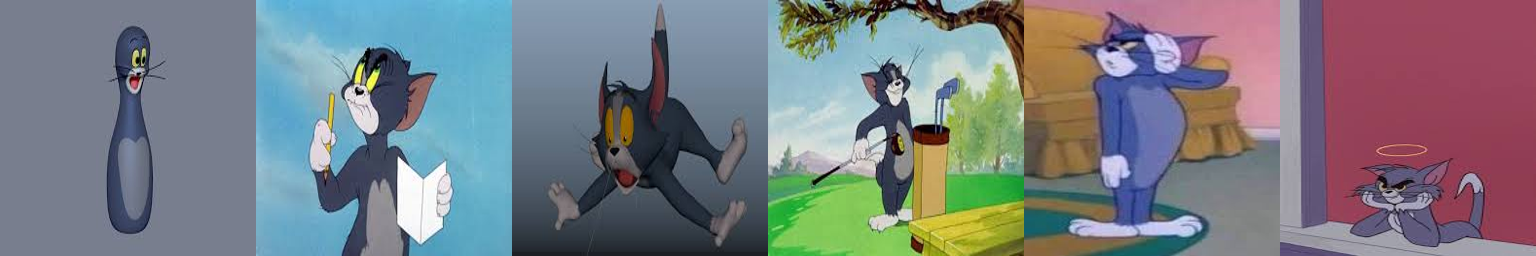

In [8]:
import glob
import os
os.environ['DATASET_NAME'] = target_directory
! rm -rf ${DATASET_NAME}/metadata.jsonl
# change path to display images from your local dir
img_paths = f"{target_directory}/*.*"  # Make sure you change name of directory to whatever name you to target directory while uploading the images.
imgs = [Image.open(path) for path in glob.glob(img_paths)]

num_imgs_to_preview = 6
image_grid(imgs[:num_imgs_to_preview], 1, num_imgs_to_preview)

The below cell will loads a pre-trained BLIP image captioning model and uses it to generate descriptive captions for input images, utilizing GPU if available for faster processing.

In [9]:
import os
os.makedirs('HF_HOME', exist_ok=True)
os.environ['HF_HOME'] = 'HF_HOME'

In [10]:
import requests
from transformers import AutoProcessor, BlipForConditionalGeneration
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# load the processor and the captioning model
blip_processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base",torch_dtype=torch.float16).to(device)

# captioning utility
def caption_images(input_image):
    inputs = blip_processor(images=input_image, return_tensors="pt").to(device, torch.float16)
    pixel_values = inputs.pixel_values

    generated_ids = blip_model.generate(pixel_values=pixel_values, max_length=50)
    generated_caption = blip_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_caption

/iti/myvenv/lib/python3.10/site-packages/transformers/utils/generic.py:482: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
2024-08-01 17:47:50.939603: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subno

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [11]:
import glob
from PIL import Image

# create a list of (Pil.Image, path) pairs
local_dir = target_directory + "/"
imgs_and_paths = [(path,Image.open(path)) for path in glob.glob(f"{local_dir}*.*")]

In [12]:
imgs_and_paths

[('input_images/images-24.jpeg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x197>),
 ('input_images/images-23.jpeg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=263x191>),
 ('input_images/images-22.jpeg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=269x187>),
 ('input_images/images-21.jpeg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=263x191>),
 ('input_images/images-20.jpeg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=184x273>),
 ('input_images/images-19.jpeg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=194x259>),
 ('input_images/images-18.jpeg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=217x233>),
 ('input_images/images-17.jpeg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=262x193>),
 ('input_images/images-16.jpeg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225>),
 ('input_images/images-15.jpeg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4

The below code cell generates captions for images with a specified prefix and saves the image filename and caption as JSON entries in a `metadata.jsonl` file.

In [13]:
os.environ["INSTANCE_PROMPT"] = "a photo of xyza cat"

import json
# you can change the caption_prefix but make sure you use some unique token as okdme used here.
caption_prefix = os.environ["INSTANCE_PROMPT"] + ", " #@param 
with open(f'{local_dir}metadata.jsonl', 'w') as outfile:
  for img in imgs_and_paths:
      caption = caption_prefix + caption_images(img[1]).split("\n")[0]
      entry = {"file_name":img[0].split("/")[-1], "prompt": caption}
      json.dump(entry, outfile)
      outfile.write('\n')

In [14]:
import gc

# delete the BLIP pipelines and free up some memory
del blip_processor, blip_model
gc.collect()
torch.cuda.empty_cache()

In [15]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

! accelerate config default

/iti/myvenv/lib/python3.10/site-packages/transformers/utils/generic.py:482: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
accelerate configuration saved at HF_HOME/accelerate/default_config.yaml


In [16]:
#!/usr/bin/env bash
! accelerate launch train_dreambooth_lora_sdxl.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0" \
  --pretrained_vae_model_name_or_path="madebyollin/sdxl-vae-fp16-fix" \
  --dataset_name="${DATASET_NAME}" \
  --output_dir="output__LoRA" \
  --caption_column="prompt" \
  --mixed_precision="fp16" \
  --instance_prompt="${INSTANCE_PROMPT}" \
  --resolution=1024 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=3 \
  --gradient_checkpointing \
  --learning_rate=1e-4 \
  --snr_gamma=5.0 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --use_8bit_adam \
  --max_train_steps=500 \
  --checkpointing_steps=717 \
  --seed="0"


/iti/myvenv/lib/python3.10/site-packages/transformers/utils/generic.py:482: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/iti/myvenv/lib/python3.10/site-packages/transformers/utils/generic.py:482: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/iti/myvenv/lib/python3.10/site-packages/transformers/utils/generic.py:339: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/iti/myvenv/lib/python3.10/site-packages/diffusers/utils/outputs.py:64: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/iti/myvenv/li

In [17]:
from diffusers import DiffusionPipeline, AutoencoderKL
import torch
# Load the VAE
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)

# Load the diffusion pipeline with the VAE
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)

# Specify the local path to the LoRA weights
local_lora_weights_path = "output__LoRA/pytorch_lora_weights.safetensors" #Ensure you add correct path where your safetensors are installed

# Load the LoRA weights
pipe.load_lora_weights(local_lora_weights_path)

# Move the pipeline to GPU
_ = pipe.to("cuda")

print("Pipeline loaded with LoRA weights and moved to GPU.")

/iti/myvenv/lib/python3.10/site-packages/diffusers/utils/outputs.py:64: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/iti/myvenv/lib/python3.10/site-packages/diffusers/utils/outputs.py:64: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Pipeline loaded with LoRA weights and moved to GPU.


  0%|          | 0/100 [00:00<?, ?it/s]

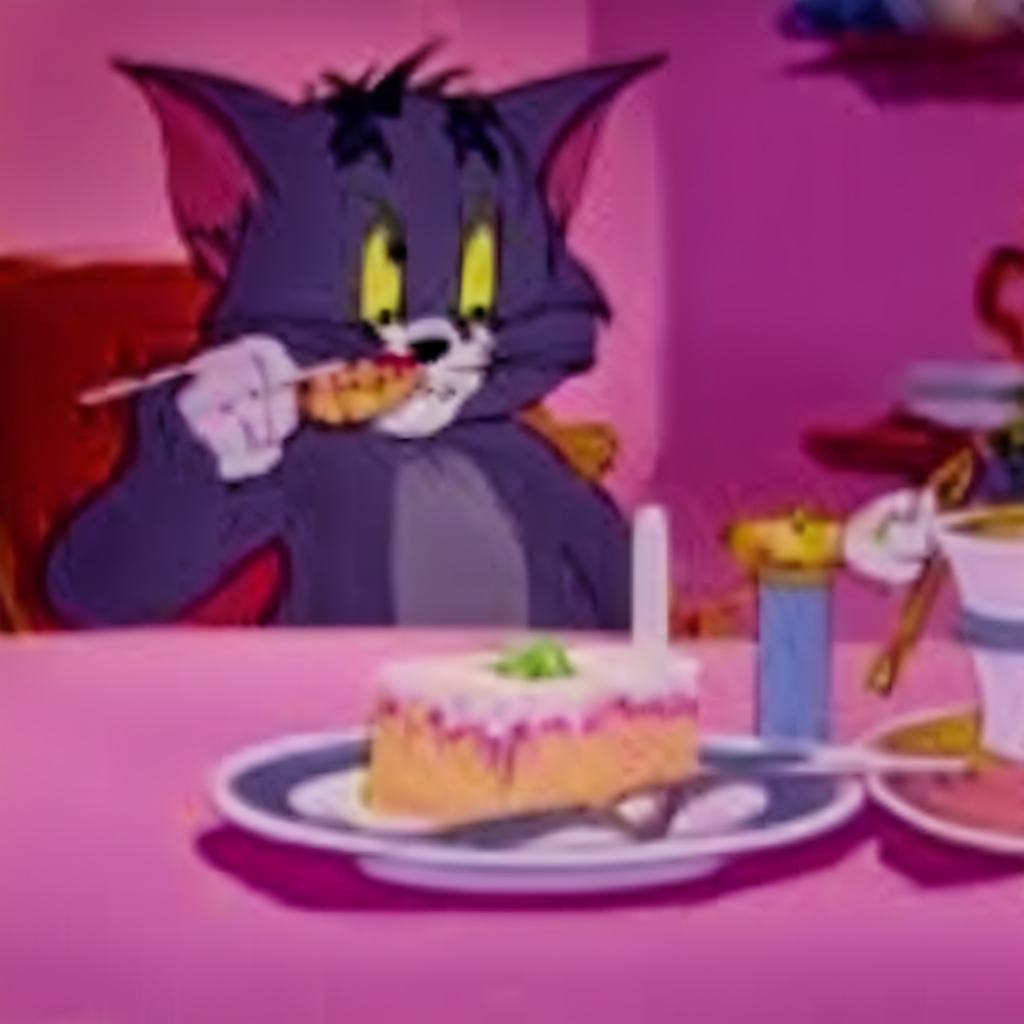

In [18]:
prompt = "a photo of xyza cat eating dessert" # @param

image = pipe(prompt=prompt, num_inference_steps=100).images[0]
image

  0%|          | 0/100 [00:00<?, ?it/s]

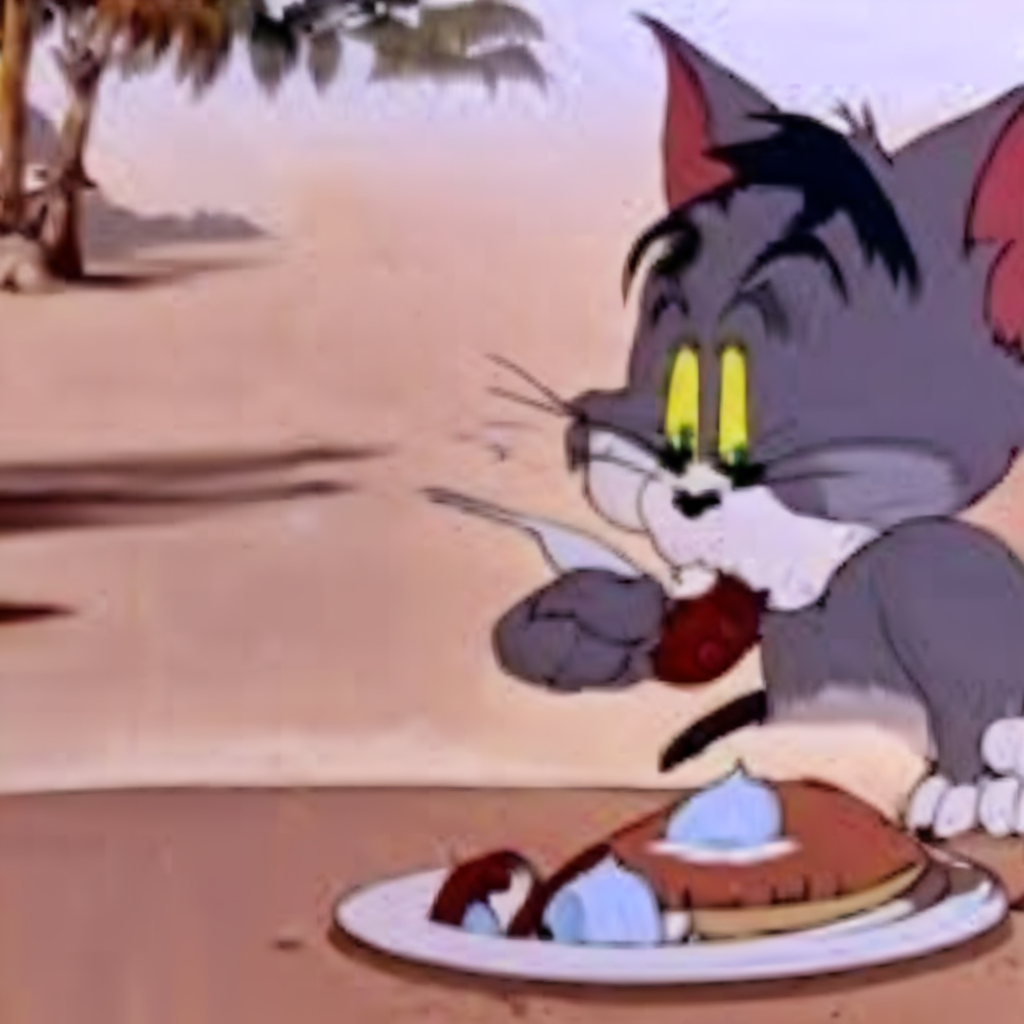

In [19]:
prompt = "a photo of xyza cat eating dessert on beach" # @param

image = pipe(prompt=prompt, num_inference_steps=100).images[0]
image

  0%|          | 0/100 [00:00<?, ?it/s]

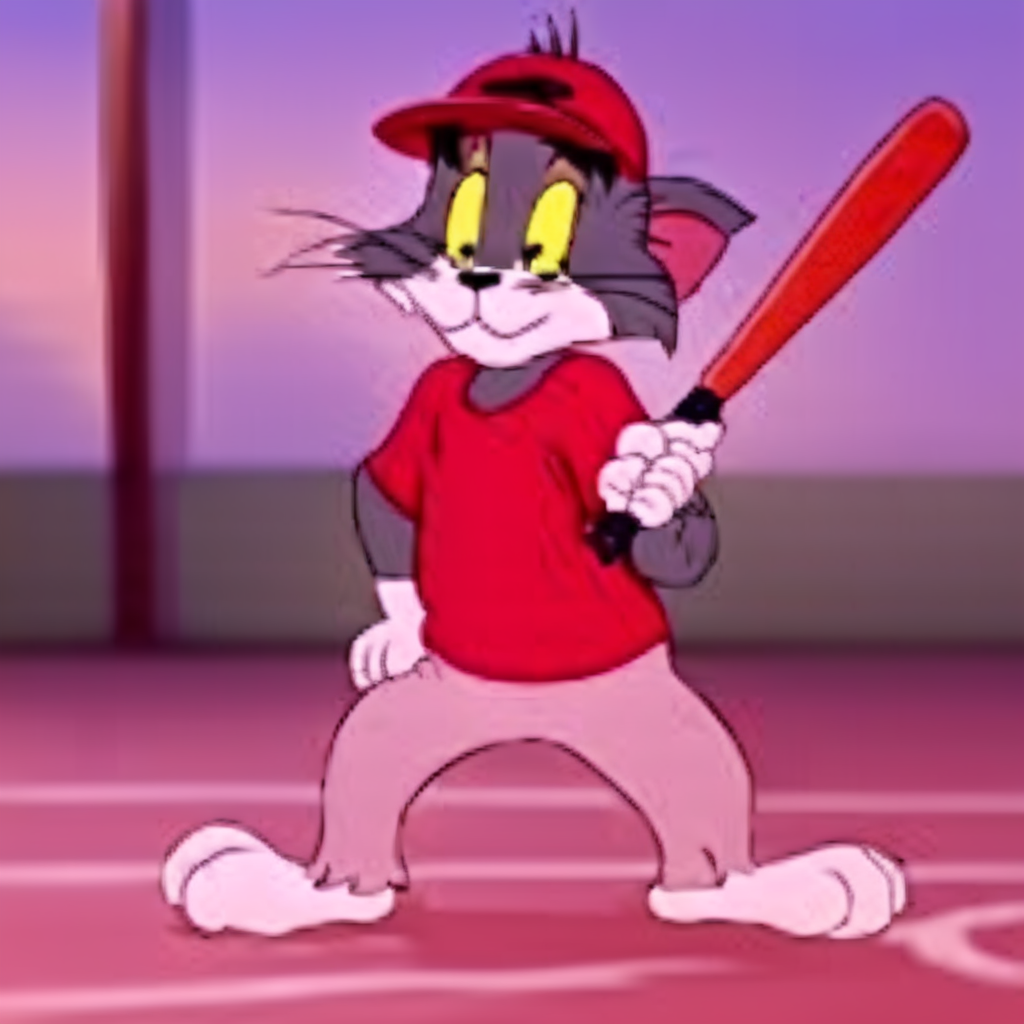

In [22]:
prompt = "a photo of xyza cat playing baseball with red t-shirt" # @param

image = pipe(prompt=prompt, num_inference_steps=100).images[0]
image

## Conclusion

This project successfully fine-tuned a Stable Diffusion model using DreamBooth and LoRA techniques to generate high-quality images of the cartoon character Tom from "Tom and Jerry". Enhancements included user-friendly image upload functionality, efficiency improvements. The project demonstrated the effectiveness of these techniques for custom image generation, providing a versatile framework adaptable to various datasets and applications.